In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
#Loading dataset
train = pd.read_csv("../Datasets/train.csv")    #train dataset
test  = pd.read_csv("../Datasets/test.csv")     #test dataset

features = train.columns.drop(['id', 'target']) #dropped id and target                      

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)

Train Shape: (250, 302)
Test Shape: (19750, 301)


In [6]:
train.head()    #printing inital rows of head data

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [7]:
test.head()     #printing initial rows of test data

,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,251,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,252,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,253,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,254,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [8]:
#Checking if NULL or missing values exist
print("Count of NAN in train :",train.isnull().sum().sum())

print("Count of NAN in test :",test.isnull().sum().sum())


Count of NAN in train : 0
Count of NAN in test : 0


In [9]:
train.target.describe()   #printing distribution of target variable

count    250.000000
mean       0.640000
std        0.480963
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

<h3>Range of mean and standard deviation of the features in the training set:</h3>

In [10]:
feat = train.drop(['id','target'], axis=1)   #all features
std_feat = feat.std(axis=1)                  #standard deviation of features
mean_feat = feat.mean(axis=1)                #mean of features
print("Mean :")
mean_feat

Mean :


0     -0.009223
1      0.086130
2      0.027657
3      0.088357
4      0.134413
5     -0.045657
6      0.055077
7     -0.054330
8     -0.053647
9      0.089320
10     0.062893
11     0.056747
12    -0.010560
13     0.024997
14     0.032473
15    -0.028993
16     0.000920
17     0.047143
18    -0.025073
19    -0.041570
20     0.055287
21     0.017410
22     0.015323
23    -0.012337
24     0.062530
25     0.060550
26    -0.016287
27    -0.046287
28    -0.062487
29    -0.035360
         ...   
220   -0.046820
221   -0.080087
222    0.104143
223   -0.093183
224   -0.129307
225   -0.030093
226   -0.077793
227    0.012743
228   -0.048330
229   -0.033903
230   -0.015760
231   -0.031890
232   -0.127340
233   -0.061797
234   -0.006583
235   -0.053880
236    0.033060
237   -0.091717
238   -0.010037
239    0.101227
240   -0.008770
241    0.030327
242    0.007850
243    0.150907
244    0.026223
245   -0.022233
246    0.017820
247   -0.087237
248    0.036570
249    0.030730
Length: 250, dtype: floa

In [11]:
print("Standard Deviation :")
std_feat

Standard Deviation :


0      1.089171
1      0.985838
2      1.012757
3      0.939743
4      0.941277
5      1.104583
6      1.092275
7      1.013964
8      0.956708
9      0.968588
10     0.984297
11     0.984173
12     1.085607
13     1.002699
14     0.969646
15     1.032831
16     0.988618
17     1.006927
18     1.012413
19     1.002107
20     1.073915
21     0.982781
22     1.024453
23     0.975395
24     1.023517
25     0.998695
26     0.993275
27     0.969592
28     1.035331
29     0.971440
         ...   
220    1.063946
221    1.027913
222    1.010114
223    0.972954
224    1.032073
225    0.887307
226    1.040310
227    1.036695
228    1.053808
229    1.013763
230    1.037551
231    0.941484
232    0.947809
233    0.990877
234    1.007667
235    1.043815
236    1.027804
237    1.017935
238    1.023151
239    1.007664
240    0.992734
241    0.981321
242    0.992395
243    0.990068
244    1.011486
245    1.081211
246    0.979557
247    1.042626
248    1.017994
249    0.947306
Length: 250, dtype: floa

<h6>The values are in a small range. No need to scale</h6>

<h2>Test for overfitting data :</h2>

In [12]:
#Data for model
x_train = train.drop(['id', 'target'], axis=1)     #feature matrix
y_train = train['target']                          #target column
x_test = test.drop(['id'], axis=1)                 #feature matrix for test
#Model instance
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)                 #training

/home/mayank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
#Predict for multiple observations
predictions = logisticRegr.predict(x_test)
# Measuring model performance
score_train = logisticRegr.score(x_train, y_train)
print("Train Score :", str(score_train*100)+" %")
print("Test Score (AUC) evaluated by Kaggle :",str(66.2)+" %")

Train Score : 100.0 %
Test Score (AUC) evaluated by Kaggle : 66.2 %


<h3>Analysis :</h3>
<b>A good fit is achieved of the model on the training data, while it does not generalize well on new, unseen data. The model learned patterns specific to the training data, which are irrelevant in other data. Accuracy achieved on the training data in 100% while the AUC score is  0.662 on the test data evaluated by Kaggle thus, the model clearly overfits on the dataset.</b>

<b>Fitting high dimensional data with very low number of instances as in this case has led overfitting due to high complexity.</b>

<h1>Avoid overfitting with feature selection and dimensionality reduction :</h1>

<b>Extra Trees Classifier is being used for feature selection. It is an ensemble learning method fundamentally based on decision trees. Like Random Forest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting</b>

/home/mayank/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


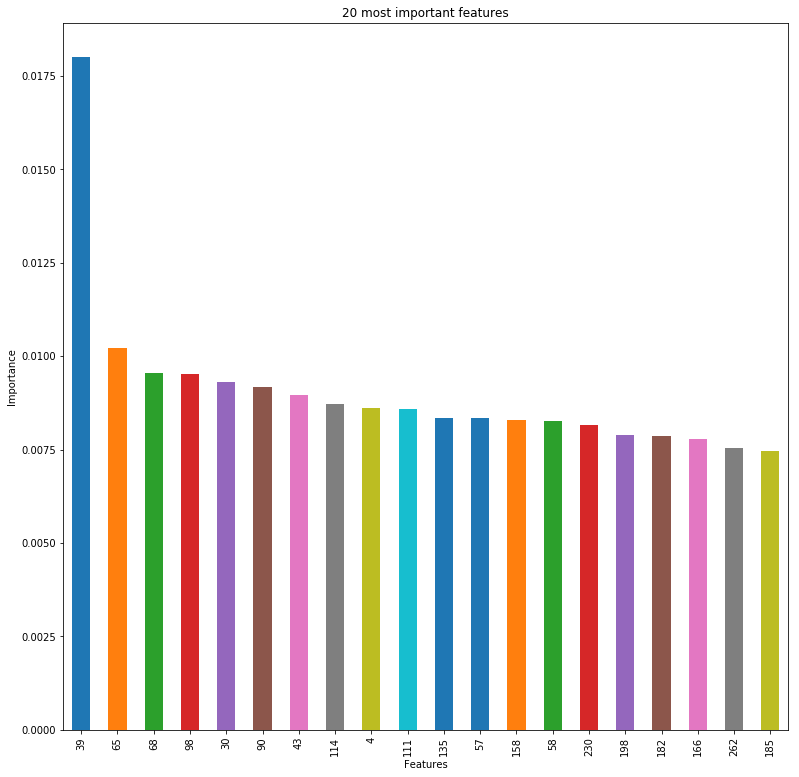

In [14]:
# Feature Selection using Feature Importance
# 20 important features :

#Dropping id and target column as they are not part of the features
x = train.drop(['id', 'target'], axis=1) #independent columns
#The target column in train set
y = train['target']
#Object to extra trees classifier to select significant features  
model = ExtraTreesClassifier()
#Fitting the model on the data
model.fit(x,y)
#print(model.feature_importances_) #inbuilt class feature_importances of tree based classifiers
#plot graph of feature importance
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
#Picking 20 features with largest importance values
feat_importances.nlargest(20).plot(kind='bar', figsize=(13,13))
#Adding title to the plot
plt.title("20 most important features")
#Adding xlabel
plt.xlabel("Features")
#Adding ylabel
plt.ylabel("Importance")
#Plot
plt.show()

In [15]:
#create an index array, with the number of features
idx = np.arange(0, x.shape[1])
#Features with importance level greater than the mean importance level
features_to_keep = idx[feat_importances > np.mean(feat_importances)]
features_to_keep

array([  0,   3,   4,   8,   9,  12,  13,  14,  15,  16,  17,  23,  25,
        26,  30,  33,  36,  37,  38,  39,  43,  55,  57,  58,  59,  61,
        63,  64,  65,  67,  68,  70,  71,  78,  83,  87,  88,  90,  91,
        94,  98,  99, 103, 104, 106, 107, 111, 112, 113, 114, 115, 116,
       117, 124, 126, 128, 129, 130, 132, 133, 134, 135, 140, 141, 144,
       147, 148, 149, 150, 154, 158, 162, 166, 168, 171, 174, 176, 180,
       182, 185, 187, 189, 193, 198, 199, 204, 208, 212, 213, 214, 215,
       217, 219, 220, 221, 225, 227, 229, 230, 231, 233, 234, 237, 244,
       245, 246, 250, 251, 252, 253, 254, 259, 262, 263, 266, 267, 268,
       277, 278, 284, 287, 290, 291, 293, 298])

In [16]:
#Heatmap of correlated features
#get correlations of features in dataset whose importance is greater than the mean importance
imp_25_feat = feat_importances.nlargest(25)
print("25 most Significant features :")
#Printing the 25 most significant features with their importance values
print(imp_25_feat)

25 most Significant features :
39     0.018021
65     0.010210
68     0.009549
98     0.009518
30     0.009317
90     0.009166
43     0.008954
114    0.008715
4      0.008616
111    0.008587
135    0.008349
57     0.008349
158    0.008298
58     0.008274
230    0.008148
198    0.007899
182    0.007865
166    0.007790
262    0.007531
185    0.007471
117    0.007396
116    0.007382
217    0.007350
298    0.007336
149    0.007214
dtype: float64


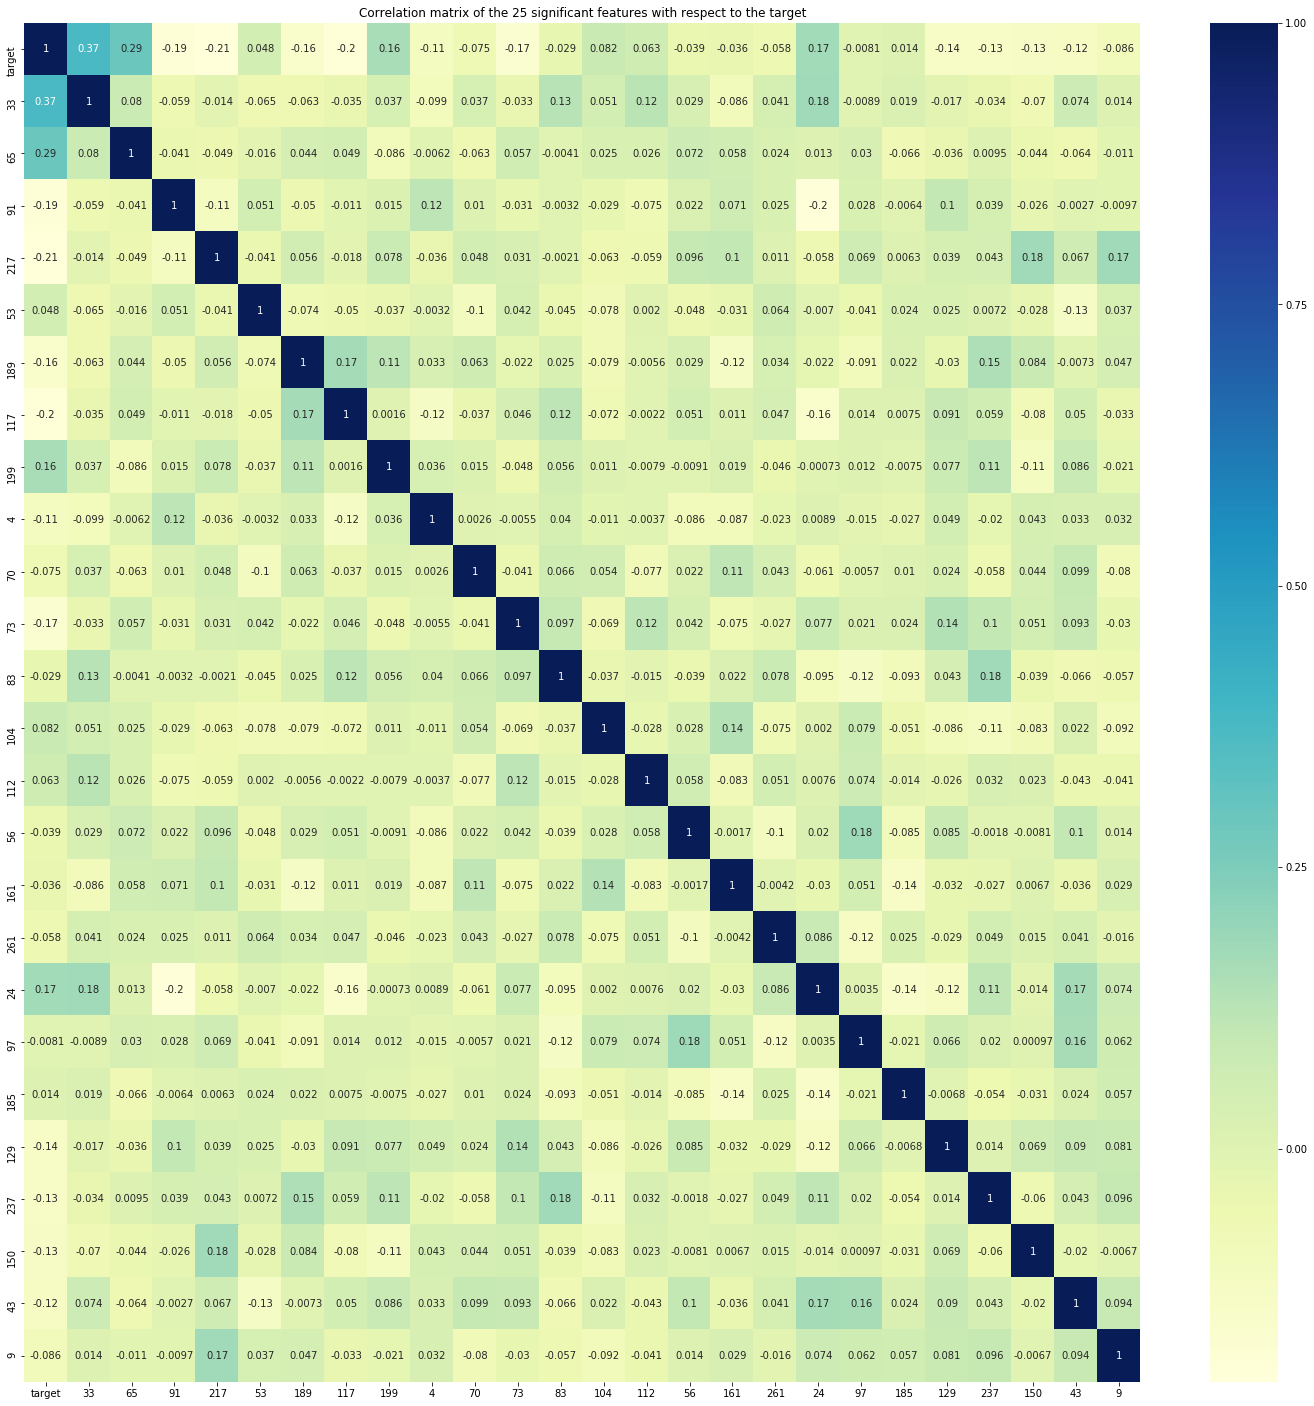

In [17]:
#target correlation matrix
imp_25_feat_list = ['target']
#List of 25 important features
feat_list = ['33','65','91','217','53','189','117','199','4','70','73','83','104','112','56','161','261','24','97','185','129','237','150','43','9']
imp_25_feat_list.extend(feat_list)
#Selecting the respective feature columns
x_feature_selected = train[imp_25_feat_list]
#Plotting correlation matrix with respect to the target
corrmat = x_feature_selected.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#Adding title
plt.title("Correlation matrix of the 25 significant features with respect to the target")
#Adding x axis label
plt.xlabel("Features")
#Adding y axis label
plt.ylabel("Features")
#Plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="YlGnBu") #RdYlGn

<h4>It is evident by the correlation matrix that the significant features are not highly correlated. Thus, we can look at methods like dimensionality reduction.</h4>

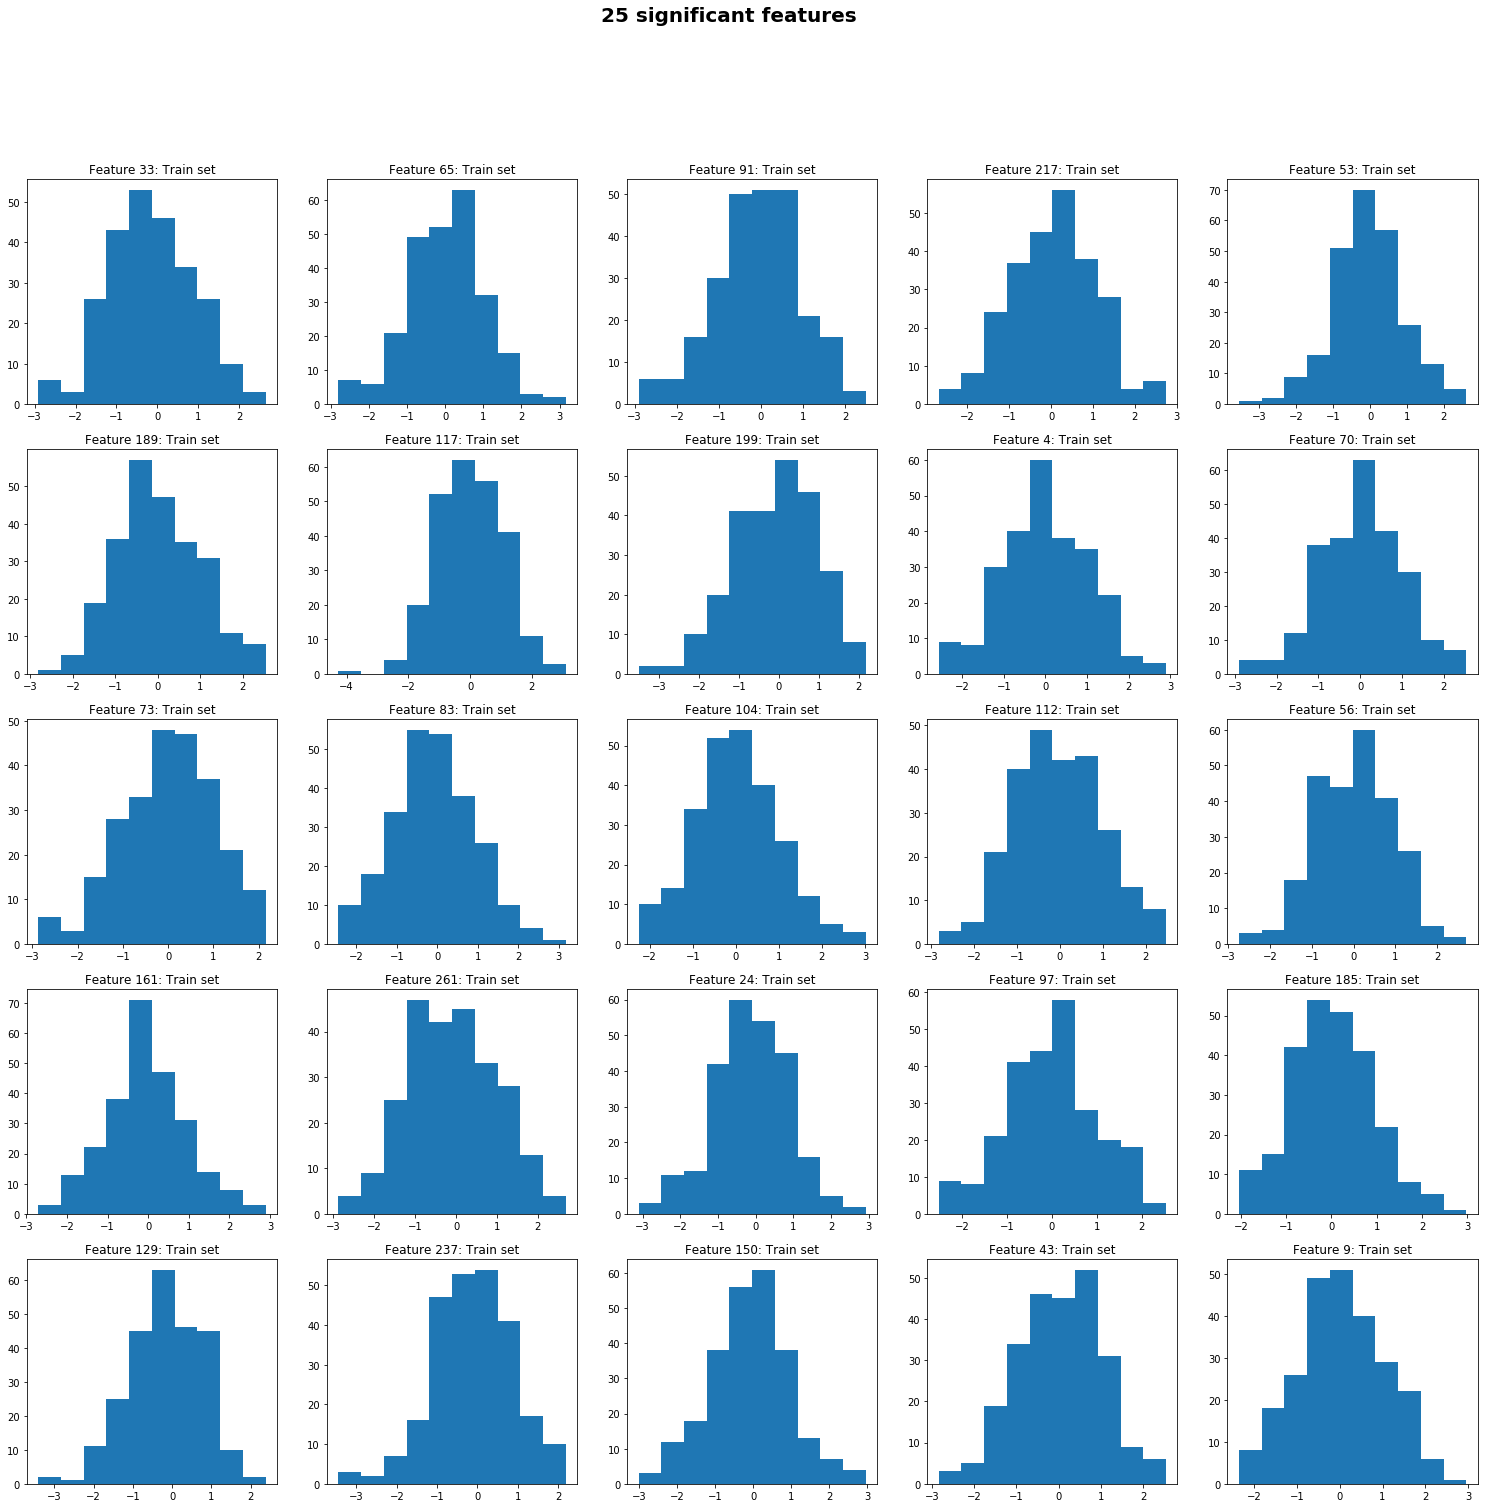

In [19]:
# Histogram plot of 25 significant features
train_plt = train[feat_list]
plt.figure(figsize=(26, 24))
#Adding title
plt.suptitle("25 significant features",fontsize=20, fontweight="bold")
#Plotting the histograms for the significant features.
for i, col in enumerate(list(train_plt.columns)):
    #Grid of 5x5
    plt.subplot(5, 5, i + 1)
    #Plot hist
    plt.hist(train_plt[col])
    #Add title
    plt.title('Feature {}: Train set'.format(col))

<h4>It can be seen that the most significant features are normally distributed, and they are unimodal.</h4>